Sakar dataset 755 datapoints

Resnet50


c:\Users\USER\Desktop\python_install\Python390\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\USER\Desktop\python_install\Python390\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:06<00:00, 16.4MB/s]


Epoch 1/15, Training Loss: 0.6177, Training Accuracy: 0.7185, Validation Accuracy: 0.7237
Epoch 2/15, Training Loss: 0.4523, Training Accuracy: 0.7947, Validation Accuracy: 0.7171
Epoch 3/15, Training Loss: 0.3216, Training Accuracy: 0.8576, Validation Accuracy: 0.8224
Epoch 4/15, Training Loss: 0.2439, Training Accuracy: 0.8907, Validation Accuracy: 0.7829
Epoch 5/15, Training Loss: 0.2399, Training Accuracy: 0.8858, Validation Accuracy: 0.7895
Epoch 6/15, Training Loss: 0.2529, Training Accuracy: 0.8808, Validation Accuracy: 0.8553
Epoch 7/15, Training Loss: 0.1745, Training Accuracy: 0.9222, Validation Accuracy: 0.8750
Epoch 8/15, Training Loss: 0.1654, Training Accuracy: 0.9288, Validation Accuracy: 0.9079
Epoch 9/15, Training Loss: 0.0933, Training Accuracy: 0.9603, Validation Accuracy: 0.6184
Epoch 10/15, Training Loss: 0.1106, Training Accuracy: 0.9487, Validation Accuracy: 0.8026
Epoch 11/15, Training Loss: 0.1629, Training Accuracy: 0.9338, Validation Accuracy: 0.8816
Epoch 12

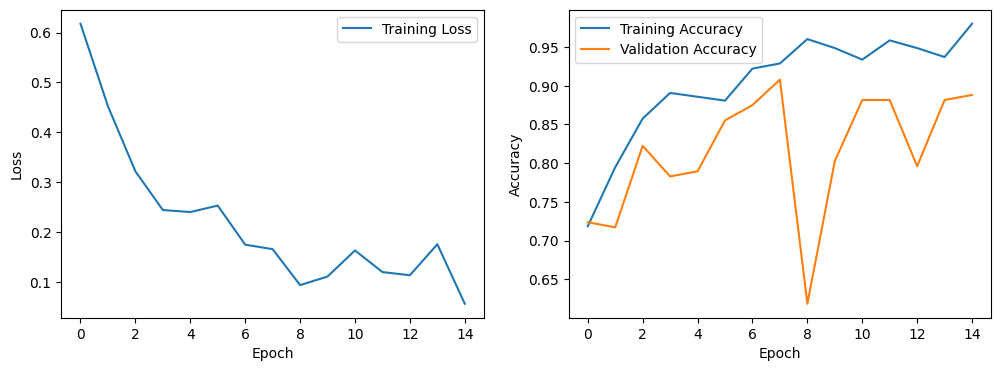

Final Training Accuracy: 0.9801
Final Validation Accuracy: 0.8882
Predicted Class Values: [1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1
 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0]
True Class Values: [1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        43
           1       0.94      0.90      0.92       109

    accuracy                           0.89       152
   macro avg       0.86      0.88      0.87       152

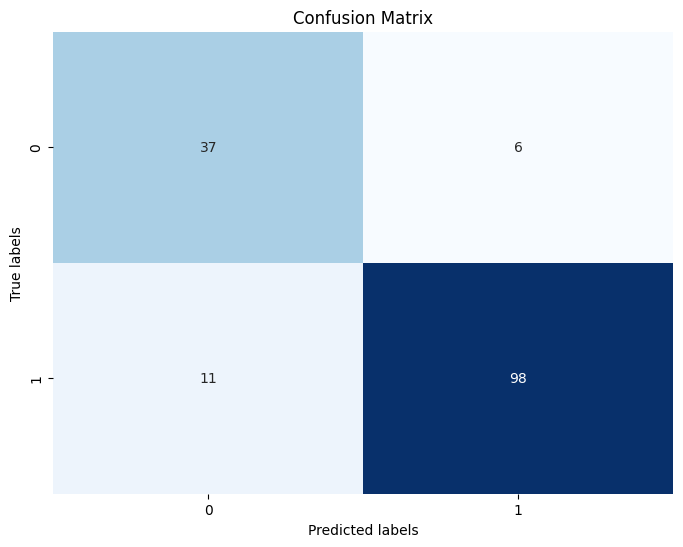

Sensitivity: 0.8991
Specificity: 0.8605


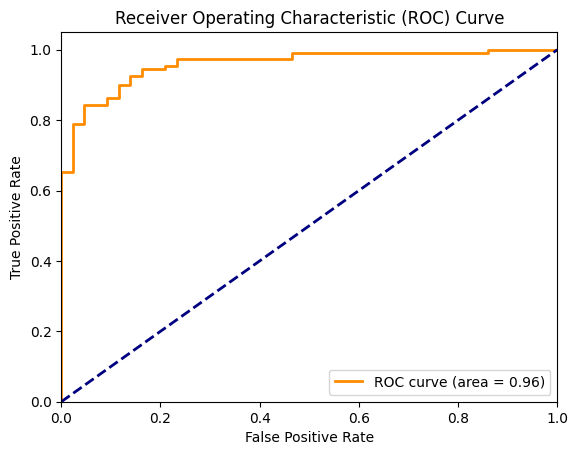

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_pred_probs):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def create_resnet50_model(num_classes):
    model = resnet50(pretrained=True)

    # Modify the last fully connected layer for binary classification
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)

    return model

def train_and_evaluate(data_path, split_ratio=0.8, num_epochs=15):
    # Image dimensions
    height, width = 224, 224  # ResNet50 expects input size (224, 224)

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((height, width)),
        transforms.ToTensor(),
    ])

    # Create dataset
    dataset = ImageFolder(root=data_path, transform=transform)

    # Split dataset into training and validation sets
    total_size = len(dataset)
    train_size = int(split_ratio * total_size)
    val_size = total_size - train_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Create ResNet50 model
    num_classes = 2  # Adjust according to your number of classes
    model = create_resnet50_model(num_classes)

    model.train()

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Lists to store the learning curve data
    train_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        average_train_loss = running_loss / len(train_loader)
        train_losses.append(average_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct_val = 0
        total_val = 0
        y_pred_probs = []
        y_true = []
        y_pred = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                y_true.extend(labels.numpy())
                y_pred.extend(predicted.numpy())
                y_pred_probs.extend(torch.softmax(outputs, 1)[:, 1].tolist())  # Probability for class 1 (positive)

        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Print training loss and validation accuracy
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {average_train_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')

    # Plot the learning curve
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Print final training and validation accuracy
    print(f'Final Training Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Final Validation Accuracy: {val_accuracies[-1]:.4f}')

    # Evaluation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_probs = np.array(y_pred_probs)

    # Print predicted class values and true class values
    print("Predicted Class Values:", y_pred)
    print("True Class Values:", y_true)

    # Print confusion matrix and classification report
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred)

    # Calculate and print specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # Plot ROC curve and calculate AUC
    plot_roc_curve(y_true, y_pred_probs)

# Example usage
data_path = r"C:\Users\USER\Downloads\PD audio\Sakar pd speech time series converted\Sakar pd speech time series converted\Normalised\spectrogram"
train_and_evaluate(data_path, num_epochs=15)



lr=0.0001
epoch 25


c:\Users\USER\Desktop\python_install\Python390\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\USER\Desktop\python_install\Python390\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25, Training Loss: 0.4305, Validation Loss: 0.3237, Training Accuracy: 0.7781, Validation Accuracy: 0.8421
Epoch 2/25, Training Loss: 0.2218, Validation Loss: 0.3255, Training Accuracy: 0.9040, Validation Accuracy: 0.8750
Epoch 3/25, Training Loss: 0.1038, Validation Loss: 0.3320, Training Accuracy: 0.9553, Validation Accuracy: 0.8684
Epoch 4/25, Training Loss: 0.1071, Validation Loss: 0.4099, Training Accuracy: 0.9669, Validation Accuracy: 0.8421
Epoch 5/25, Training Loss: 0.0535, Validation Loss: 0.4478, Training Accuracy: 0.9801, Validation Accuracy: 0.8750
Epoch 6/25, Training Loss: 0.0408, Validation Loss: 0.3567, Training Accuracy: 0.9901, Validation Accuracy: 0.9013
Epoch 7/25, Training Loss: 0.0297, Validation Loss: 0.2831, Training Accuracy: 0.9884, Validation Accuracy: 0.9211
Epoch 8/25, Training Loss: 0.0308, Validation Loss: 0.6896, Training Accuracy: 0.9917, Validation Accuracy: 0.8224
Epoch 9/25, Training Loss: 0.0393, Validation Loss: 0.6433, Training Accuracy: 0

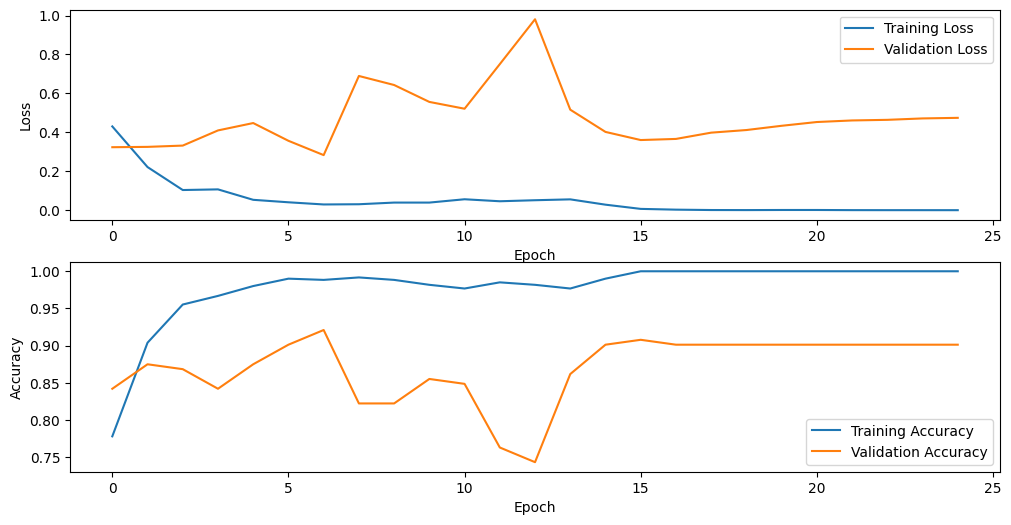

Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.9013
Predicted Class Values: [1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1 1]
True Class Values: [1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 1]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.92      0.94      0.93       108

    accuracy                           0.90       152
   macro avg       0.89      0.87      0.88       152

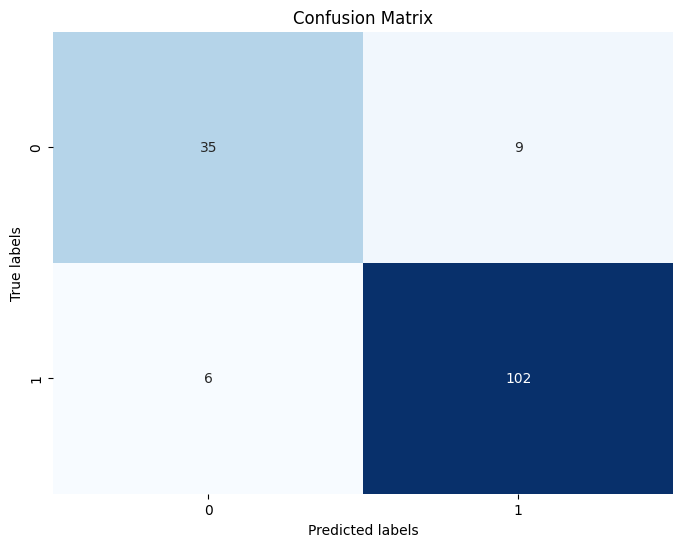

Sensitivity: 0.9444
Specificity: 0.7955


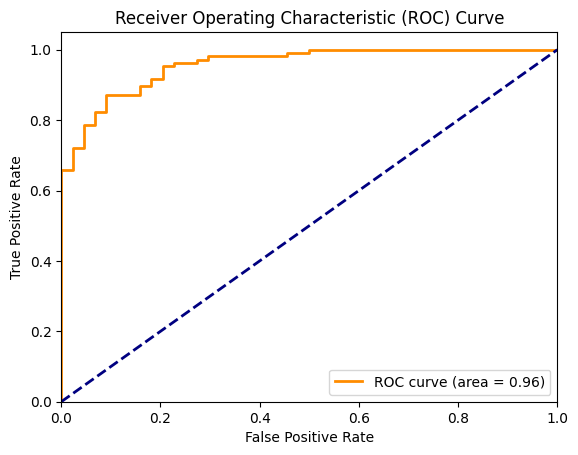

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_pred_probs):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def create_resnet50_model(num_classes):
    model = resnet50(pretrained=True)

    # Modify the last fully connected layer for binary classification
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)

    return model

def train_and_evaluate(data_path, num_epochs=25, batch_size=32, learning_rate=0.0001):
    # Image dimensions
    height, width = 224, 224  # ResNet50 expects input size (224, 224)

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((height, width)),
        transforms.ToTensor(),
    ])

    # Create dataset
    dataset = ImageFolder(root=data_path, transform=transform)

    # Split dataset into training and validation sets
    total_size = len(dataset)
    split_ratio = 0.8
    train_size = int(split_ratio * total_size)
    val_size = total_size - train_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Create ResNet50 model
    num_classes = 2  # Adjust according to your number of classes
    model = create_resnet50_model(num_classes)

    model.train()

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store the learning curve data
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        average_train_loss = running_loss / len(train_loader)
        train_losses.append(average_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        y_pred_probs = []
        y_true = []
        y_pred = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                y_true.extend(labels.numpy())
                y_pred.extend(predicted.numpy())
                y_pred_probs.extend(torch.softmax(outputs, 1)[:, 1].tolist())  # Probability for class 1 (positive)

        average_val_loss = running_val_loss / len(val_loader)
        val_losses.append(average_val_loss)
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Print training loss and validation accuracy
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {average_train_loss:.4f}, '
              f'Validation Loss: {average_val_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')

    # Plot the learning curve
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Print final training and validation accuracy
    print(f'Final Training Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Final Validation Accuracy: {val_accuracies[-1]:.4f}')

    # Evaluation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_probs = np.array(y_pred_probs)

    # Print predicted class values and true class values
    print("Predicted Class Values:", y_pred)
    print("True Class Values:", y_true)

    # Print confusion matrix and classification report
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred)

    # Calculate and print specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # Plot ROC curve and calculate AUC
    plot_roc_curve(y_true, y_pred_probs)

# Example usage
data_path = r"C:\Users\USER\Downloads\PD audio\Sakar pd speech time series converted\Sakar pd speech time series converted\Normalised\spectrogram"
train_and_evaluate(data_path, num_epochs=25, batch_size=32, learning_rate=0.0001)


Testing code with seperate test and train data set at 50 epoch 32 batch size and 0.0001 lr


Epoch 1/50, Training Loss: 0.5125, Test Loss: 0.5571, Training Accuracy: 0.7285, Test Accuracy: 0.7434
Epoch 2/50, Training Loss: 0.1789, Test Loss: 0.7745, Training Accuracy: 0.9321, Test Accuracy: 0.6711
Epoch 3/50, Training Loss: 0.0564, Test Loss: 0.7683, Training Accuracy: 0.9785, Test Accuracy: 0.7632
Epoch 4/50, Training Loss: 0.0644, Test Loss: 0.8124, Training Accuracy: 0.9735, Test Accuracy: 0.7895
Epoch 5/50, Training Loss: 0.0726, Test Loss: 0.6771, Training Accuracy: 0.9669, Test Accuracy: 0.7632
Epoch 6/50, Training Loss: 0.0721, Test Loss: 0.6823, Training Accuracy: 0.9702, Test Accuracy: 0.8289
Epoch 7/50, Training Loss: 0.0590, Test Loss: 0.7079, Training Accuracy: 0.9785, Test Accuracy: 0.8289
Epoch 8/50, Training Loss: 0.0477, Test Loss: 0.5118, Training Accuracy: 0.9801, Test Accuracy: 0.8289
Epoch 9/50, Training Loss: 0.0413, Test Loss: 0.8848, Training Accuracy: 0.9818, Test Accuracy: 0.7697
Epoch 10/50, Training Loss: 0.0250, Test Loss: 0.6919, Training Accuracy:

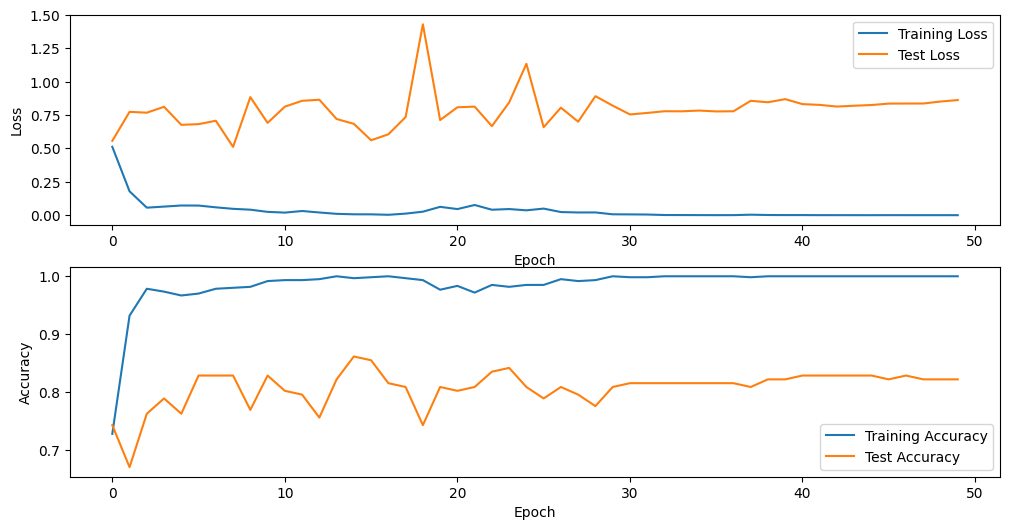

Final Training Accuracy: 1.0000
Final Test Accuracy: 0.8224
Predicted Class Values: [0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
True Class Values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        39
           1       0.86      0.91      0.88       113

    accuracy                           0.82       152
   macro avg       0.77      0.74      0.75       152
weigh

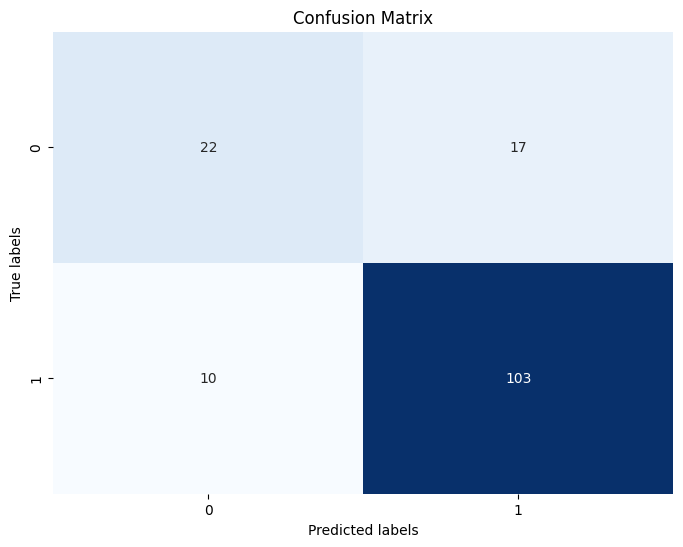

Sensitivity: 0.9115
Specificity: 0.5641


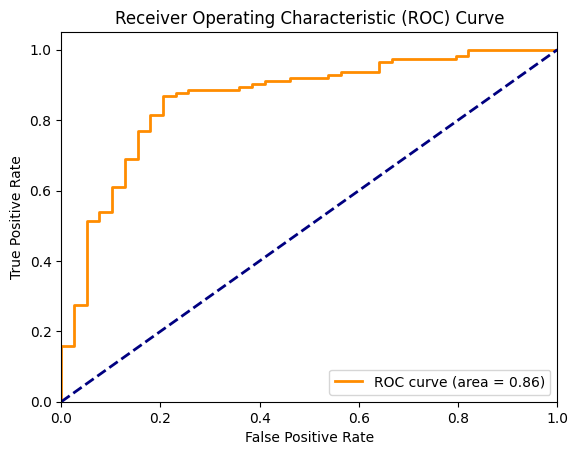

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_pred_probs):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def create_resnet50_model(num_classes):
    model = resnet50(pretrained=True)

    # Modify the last fully connected layer for binary classification
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)

    return model

def train_and_evaluate(train_data_path, test_data_path, num_epochs=25, batch_size=32, learning_rate=0.0001):
    # Image dimensions
    height, width = 224, 224  # ResNet50 expects input size (224, 224)

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((height, width)),
        transforms.ToTensor(),
    ])

    # Create datasets
    train_dataset = ImageFolder(root=train_data_path, transform=transform)
    test_dataset = ImageFolder(root=test_data_path, transform=transform)

    # Create loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Create ResNet50 model
    num_classes = len(train_dataset.classes)
    model = create_resnet50_model(num_classes)

    model.train()

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store the learning curve data
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        average_train_loss = running_loss / len(train_loader)
        train_losses.append(average_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        running_test_loss = 0.0
        correct_test = 0
        total_test = 0
        y_pred_probs = []
        y_true = []
        y_pred = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                test_loss = criterion(outputs, labels)
                running_test_loss += test_loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
                y_true.extend(labels.numpy())
                y_pred.extend(predicted.numpy())
                y_pred_probs.extend(torch.softmax(outputs, 1)[:, 1].tolist())  # Probability for class 1 (positive)

        average_test_loss = running_test_loss / len(test_loader)
        test_losses.append(average_test_loss)
        test_accuracy = correct_test / total_test
        test_accuracies.append(test_accuracy)

        # Print training loss and validation accuracy
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {average_train_loss:.4f}, '
              f'Test Loss: {average_test_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.4f}, '
              f'Test Accuracy: {test_accuracy:.4f}')

    # Plot the learning curve
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Print final training and test accuracy
    print(f'Final Training Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Final Test Accuracy: {test_accuracies[-1]:.4f}')

    # Evaluation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_probs = np.array(y_pred_probs)

    # Print predicted class values and true class values
    print("Predicted Class Values:", y_pred)
    print("True Class Values:", y_true)

    # Print confusion matrix and classification report
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred)

    # Calculate and print specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # Plot ROC curve and calculate AUC
    plot_roc_curve(y_true, y_pred_probs)

# Define hyperparameters
num_epochs = 50
batch_size = 32
learning_rate = 0.0001

# Example usage
train_data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Sakar pd speech time series converted\Normalised\Pure spctrgrm\train"
test_data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Sakar pd speech time series converted\Normalised\Pure spctrgrm\test"
train_and_evaluate(train_data_path, test_data_path, num_epochs=num_epochs, batch_size=batch_size, learning_rate=learning_rate)


Sakar dataset SELECTED FEATURES ONLY


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25, Training Loss: 0.5352, Validation Loss: 0.5357, Training Accuracy: 0.7401, Validation Accuracy: 0.7763
Epoch 2/25, Training Loss: 0.4646, Validation Loss: 0.4954, Training Accuracy: 0.7930, Validation Accuracy: 0.7566
Epoch 3/25, Training Loss: 0.4510, Validation Loss: 0.4911, Training Accuracy: 0.7964, Validation Accuracy: 0.8224
Epoch 4/25, Training Loss: 0.4323, Validation Loss: 0.4847, Training Accuracy: 0.8129, Validation Accuracy: 0.8092
Epoch 5/25, Training Loss: 0.4142, Validation Loss: 0.4965, Training Accuracy: 0.8427, Validation Accuracy: 0.8092
Epoch 6/25, Training Loss: 0.3872, Validation Loss: 0.5999, Training Accuracy: 0.8493, Validation Accuracy: 0.7961
Epoch 7/25, Training Loss: 0.3752, Validation Loss: 0.7343, Training Accuracy: 0.8377, Validation Accuracy: 0.7829
Epoch 8/25, Training Loss: 0.3658, Validation Loss: 0.7106, Training Accuracy: 0.8526, Validation Accuracy: 0.6711
Epoch 9/25, Training Loss: 0.3025, Validation Loss: 0.6342, Training Accuracy: 0

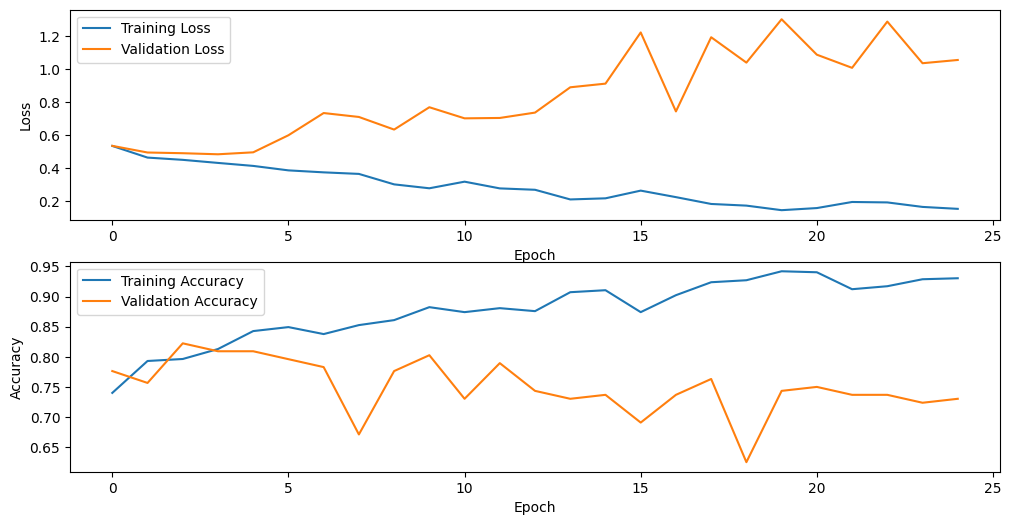

Final Training Accuracy: 0.9305
Final Validation Accuracy: 0.7303
Predicted Class Values: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1]
True Class Values: [0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1
 0 1 1 1]
              precision    recall  f1-score   support

           0       0.43      0.32      0.37        37
           1       0.80      0.86      0.83       115

    accuracy                           0.73       152
   macro avg       0.61      0.59      0.60       152

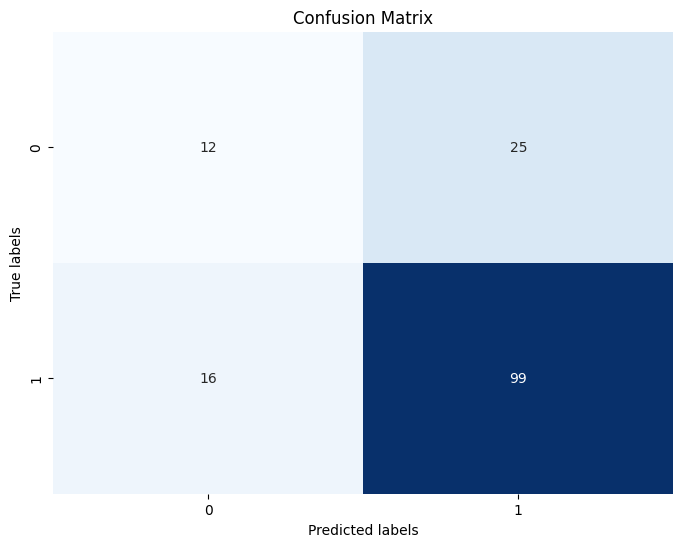

Sensitivity: 0.8609
Specificity: 0.3243


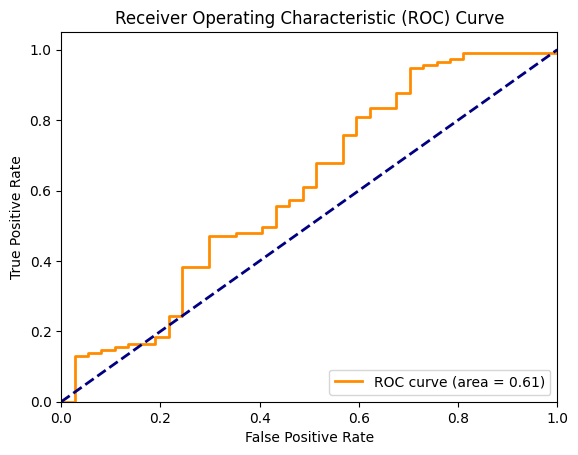

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_pred_probs):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def create_resnet50_model(num_classes):
    model = resnet50(pretrained=True)

    # Modify the last fully connected layer for binary classification
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)

    return model

def train_and_evaluate(data_path, num_epochs=25, batch_size=32, learning_rate=0.0001):
    # Image dimensions
    height, width = 224, 224  # ResNet50 expects input size (224, 224)

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((height, width)),
        transforms.ToTensor(),
    ])

    # Create dataset
    dataset = ImageFolder(root=data_path, transform=transform)

    # Split dataset into training and validation sets
    total_size = len(dataset)
    split_ratio = 0.8
    train_size = int(split_ratio * total_size)
    val_size = total_size - train_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Create ResNet50 model
    num_classes = 2  # Adjust according to your number of classes
    model = create_resnet50_model(num_classes)

    model.train()

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store the learning curve data
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        average_train_loss = running_loss / len(train_loader)
        train_losses.append(average_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        y_pred_probs = []
        y_true = []
        y_pred = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                y_true.extend(labels.numpy())
                y_pred.extend(predicted.numpy())
                y_pred_probs.extend(torch.softmax(outputs, 1)[:, 1].tolist())  # Probability for class 1 (positive)

        average_val_loss = running_val_loss / len(val_loader)
        val_losses.append(average_val_loss)
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Print training loss and validation accuracy
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {average_train_loss:.4f}, '
              f'Validation Loss: {average_val_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')

    # Plot the learning curve
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Print final training and validation accuracy
    print(f'Final Training Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Final Validation Accuracy: {val_accuracies[-1]:.4f}')

    # Evaluation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_probs = np.array(y_pred_probs)

    # Print predicted class values and true class values
    print("Predicted Class Values:", y_pred)
    print("True Class Values:", y_true)

    # Print confusion matrix and classification report
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred)

    # Calculate and print specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # Plot ROC curve and calculate AUC
    plot_roc_curve(y_true, y_pred_probs)

# Example usage
data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Sakar pd speech time series converted\Normalised\Spectrogram selected features"
train_and_evaluate(data_path, num_epochs=25, batch_size=32, learning_rate=0.0001)
